<a href="https://colab.research.google.com/github/ALW-N/NNDL_LAB/blob/main/Alwin_207_ETE3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed


df = pd.read_csv("weather_data.csv")

print(df.head())


         date  temperature
0  2014-01-01    10.248357
1  2014-01-02     9.950428
2  2014-01-03    10.362958
3  2014-01-04    10.820167
4  2014-01-05     9.961091


#Preprocess the Data

In [16]:
df['date'] = pd.to_datetime(df['date'])

scaler = MinMaxScaler()
df['temperature_scaled'] = scaler.fit_transform(df[['temperature']])

sequence_length = 30
data = []
for i in range(len(df) - sequence_length):
    data.append(df['temperature_scaled'].values[i:i + sequence_length])
data = np.array(data)

train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

train_data = train_data.reshape(train_data.shape[0], sequence_length, 1)
test_data = test_data.reshape(test_data.shape[0], sequence_length, 1)

print(df.head(38))


         date  temperature  temperature_scaled
0  2014-01-01    10.248357            0.564139
1  2014-01-02     9.950428            0.539819
2  2014-01-03    10.362958            0.573493
3  2014-01-04    10.820167            0.610814
4  2014-01-05     9.961091            0.540689
5  2014-01-06     9.980585            0.542281
6  2014-01-07    10.906708            0.617879
7  2014-01-08    10.520223            0.586330
8  2014-01-09     9.921119            0.537427
9  2014-01-10    10.446428            0.580307
10 2014-01-11     9.962664            0.540818
11 2014-01-12     9.980658            0.542287
12 2014-01-13    10.353573            0.572727
13 2014-01-14     9.294931            0.486312
14 2014-01-15     9.407996            0.495541
15 2014-01-16    10.008091            0.544526
16 2014-01-17     9.801488            0.527661
17 2014-01-18    10.483579            0.583339
18 2014-01-19     9.890870            0.534957
19 2014-01-20     9.657024            0.515869
20 2014-01-21

# LSTM Autoencoder

In [9]:
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, 1), return_sequences=False),
    RepeatVector(sequence_length),
    LSTM(64, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])

model.compile(optimizer='adam', loss='mse')

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 30, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 30, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(train_data, train_data, epochs=30, batch_size=32, validation_split=0.1, shuffle=True)


Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.1579 - val_loss: 0.0175
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0137 - val_loss: 0.0070
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0025 - val_loss: 0.0036
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 9/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 10/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 11/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 12/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0

#Anomaly Detection:

In [11]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)

train_loss = np.mean(np.abs(train_data - train_pred), axis=1)
test_loss = np.mean(np.abs(test_data - test_pred), axis=1)

threshold = np.percentile(train_loss, 95)

anomalies = np.where(test_loss > threshold)[0]
print(f"Number of detected anomalies: {len(anomalies)}")


64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Number of detected anomalies: 2


#Visualisation:

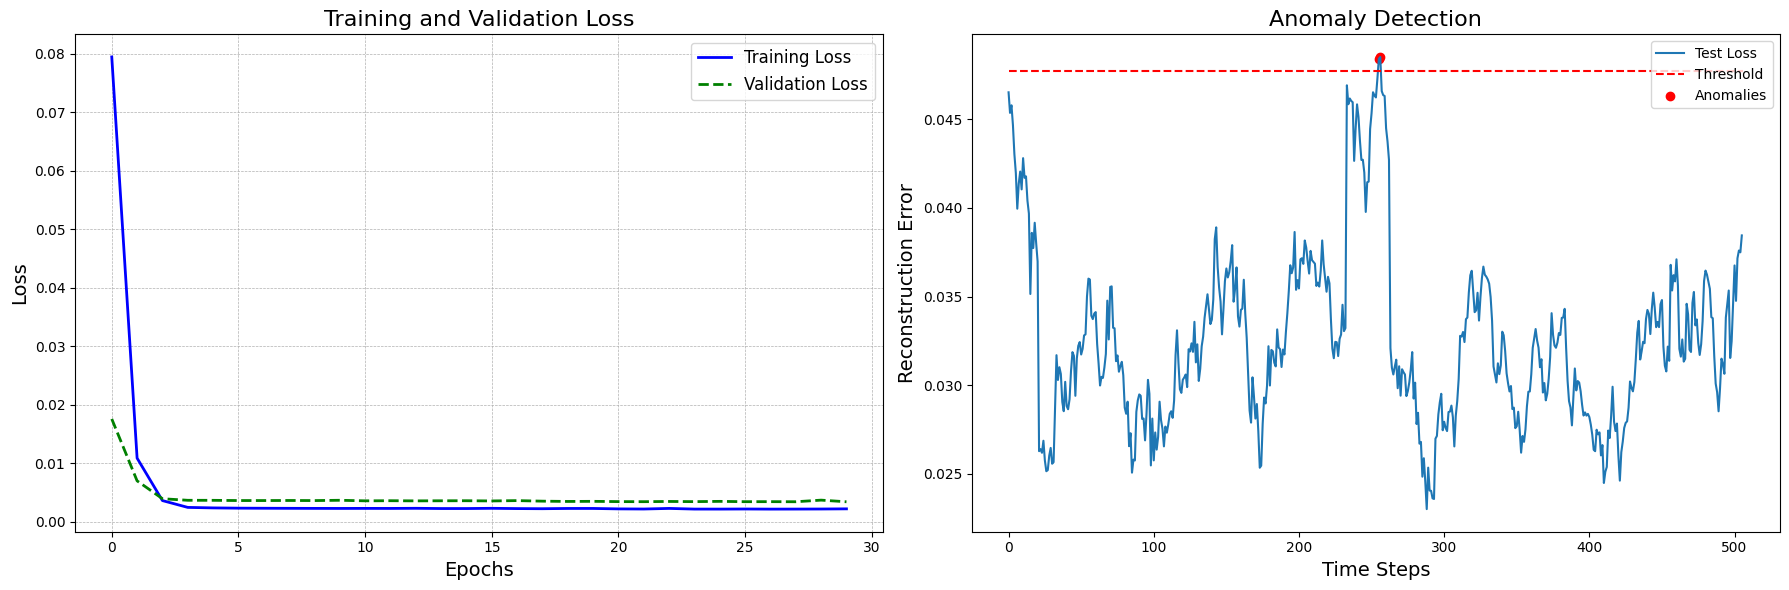

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].plot(history.history['loss'], label='Training Loss', color='b', linestyle='-', linewidth=2)
axs[0].plot(history.history['val_loss'], label='Validation Loss', color='g', linestyle='--', linewidth=2)
axs[0].set_xlabel('Epochs', fontsize=14)
axs[0].set_ylabel('Loss', fontsize=14)
axs[0].set_title('Training and Validation Loss', fontsize=16)
axs[0].legend(loc='upper right', fontsize=12)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

axs[1].plot(test_loss, label='Test Loss')
axs[1].hlines(threshold, xmin=0, xmax=len(test_loss), colors='r', linestyles='dashed', label='Threshold')
axs[1].scatter(anomalies, test_loss[anomalies], color='r', label='Anomalies')
axs[1].set_xlabel('Time Steps', fontsize=14)
axs[1].set_ylabel('Reconstruction Error', fontsize=14)
axs[1].set_title('Anomaly Detection', fontsize=16)
axs[1].legend()

plt.tight_layout()
plt.show()


#Interpretation :


Training and Validation Loss:

- The training loss  drops quickly in the beginning, showing that the model is quickly learning and fitting the data well.
- The validation loss also decreases, but more slowly, and eventually stabilizes. This means that the model is able to generalize its learning to new, unseen data reasonably well.
- The small gap between the training and validation losses is a positive sign, as it indicates that the model is not overfitting

Anomaly Detection:

- The test loss shows how well the model is able to reconstruct the test data. It stays fairly stable but has some spikes at certain points.
- The threshold represents the cutoff for identifying anomalies. Any data point with a reconstruction error above this threshold is flagged as an anomaly.
- The anomalies mark the specific points where the model's reconstruction error was unusually high, suggesting that these points deviate from normal behavior.
- The spikes in the test loss that exceed the threshold indicate instances where the temperature readings or patterns were significantly different from what the model had learned, pointing to potential anomalies.

Overall: The model has effectively learned to distinguish between normal and unusual patterns in the data. The anomaly detection mechanism works well, as it highlights data points that don't fit the expected patterns, based on how well the model was able to reconstruct them.